In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots 
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
 

In [25]:
Auto = load_data("Auto")
mpg01 = Auto['mpg'] > Auto['mpg'].median()
Auto['mpg01'] = mpg01.astype(int)
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


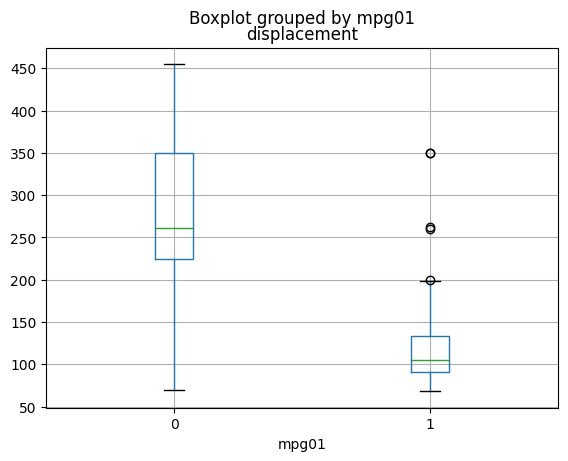

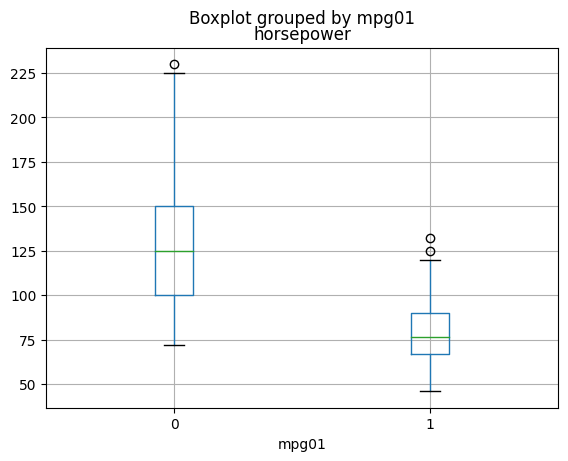

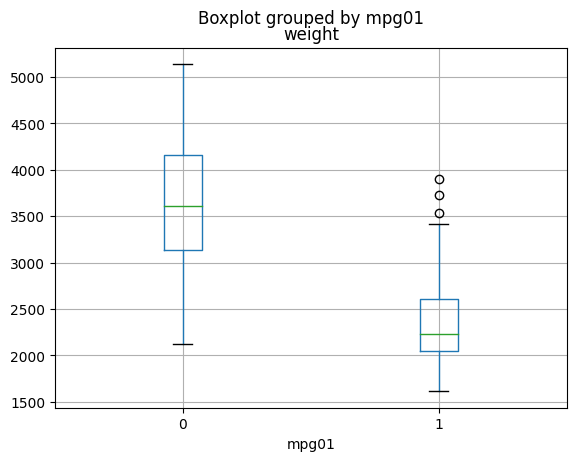

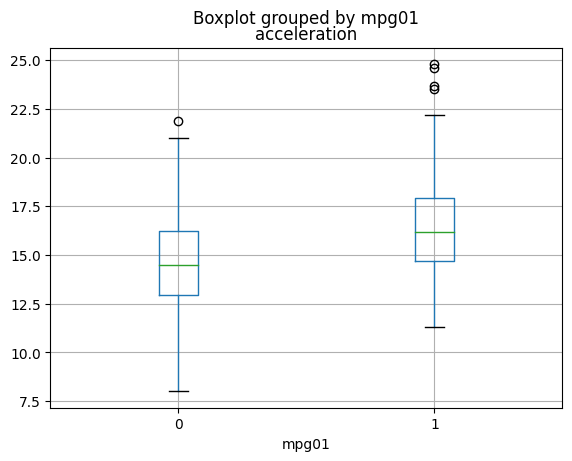

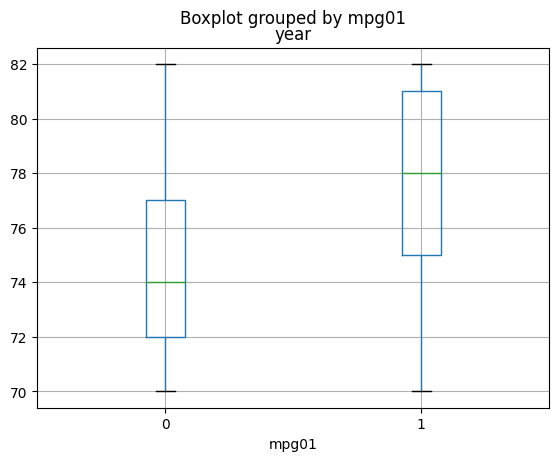

In [36]:
for col in Auto.columns.drop(['mpg01','name','cylinders','origin','mpg']):
    Auto.boxplot(col,by='mpg01')
# Going to exclude mpg because it obviously indicates mpg01
# Good predictors for mpg01 seem to be displacement, horsepower, weight, acceleration(weak), year (weak)

In [47]:
# SPLITTING DATASET INTO TRAIN/TEST SPLITS

feature_df = Auto[['displacement','horsepower','weight','acceleration','year']]
# Scaling features
scaler = StandardScaler(with_mean = True, # Indicates whether or not we subtract mean
                        with_std = True, # Indicates whether or not we scale columns to have std 1
                        copy = True) # Always copy data instead of doing in-place

scaler.fit(feature_df)
X_std = scaler.transform(feature_df)
# Now every column has std dev 1
# Not exactly 1 because they were calculating using 1/n variance instead of 1/(n-1)
feature_std = pd.DataFrame(
    X_std,
    columns=feature_df.columns);
feature_std.std()

# Split data, with test having 1000 observations
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(feature_std,
                            mpg01,
                            test_size=30,
                            random_state = 0 # Random Seed
                           )


122    False
353     True
76     False
140     True
162    False
Name: mpg, dtype: bool

In [75]:
# Now we will perform LDA on the dataset 
lda = LDA(store_covariance=True)

lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,12,0
True,4,14


In [76]:
# Test Error rate: 13.3%
4/30

0.13333333333333333

In [58]:
# QDA
qda = QDA(store_covariance=True)
qda.fit(X_train,y_train)
qda_pred = qda.predict(X_test)
confusion_table(qda_pred,y_test)

Truth,False,True
Predicted,,
False,12,1
True,4,13


In [71]:
# Test error rate: 16.6%
5/30


0.16666666666666666

In [77]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
# Making predictions
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, y_test)
# Same predictions as LDA

Truth,False,True
Predicted,,
False,12,0
True,4,14


In [79]:
# Using KNN with n=1
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,14,0
True,2,14


In [80]:
# Error rate: 6.6%
2/30

0.06666666666666667

In [85]:
# Using KNN with n=3
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
knn3_pred = knn3.predict(X_test)
confusion_table(knn3_pred, y_test)

Truth,False,True
Predicted,,
False,15,0
True,1,14


In [86]:
# Using KNN with n=5
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, y_train)
knn5_pred = knn5.predict(X_test)
confusion_table(knn5_pred, y_test)

Truth,False,True
Predicted,,
False,15,2
True,1,12


In [87]:
# Using KNN with n=10
knn10 = KNeighborsClassifier(n_neighbors = 10)
knn10.fit(X_train, y_train)
knn10_pred = knn10.predict(X_test)
confusion_table(knn10_pred, y_test)

Truth,False,True
Predicted,,
False,14,1
True,2,13
